<h1 align = "center"> The_Indegenous_Online_Test </h1>

# Content of Task

1.  [Library Imported](#1)
2.  [Information Retrival from **newsapi.org** regarding virus.](#2)
3.  [Formatting of Data into **JSON** format.](#3)
4.  [Articles into Dataframe](#4)
5.  [Formatting **published date** as yyyy-mm-dd.](#5)
6.  [Short Title for given Titles](#6)
7.  [Cleaning description and content text contains **html text**.](#7)
8.  [Sentiment Analysis for combined text of **Description + Content**.](#8)
9.  [Graphical view for sentiment Analysis](#9)
10. [Conclusion](#10)


### 1. Library Imported <a id =1></a>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
from difflib import SequenceMatcher

### 2. Information Retrival from **newsapi.org** regarding virus.<a id=2></a>

In [42]:
with open('/kaggle/input/password/pass.txt') as f:
    contents = f.read()
    r = contents.split('=')
    clean_r = r[1].strip().replace('$','')
    password = clean_r.replace('0','')
url = "https://newsapi.org/v2/everything?q=virus&apiKey="+password
response_API = requests.get(url)
print(response_API)

<Response [200]>


### 3. Formatting of Data into JSON format.<a id = 3></a>

In [45]:
data = response_API.text
r = json.loads(data)
df = pd.DataFrame.from_dict(r)
df

,status,totalResults,articles
0,ok,22862,"{'source': {'id': 'bbc-news', 'name': 'BBC New..."
1,ok,22862,"{'source': {'id': 'bbc-news', 'name': 'BBC New..."
2,ok,22862,"{'source': {'id': 'cnn', 'name': 'CNN'}, 'auth..."
3,ok,22862,"{'source': {'id': 'cnn', 'name': 'CNN'}, 'auth..."
4,ok,22862,"{'source': {'id': None, 'name': 'Gizmodo.com'}..."
...,...,...,...
95,ok,22862,"{'source': {'id': 'bbc-news', 'name': 'BBC New..."
96,ok,22862,"{'source': {'id': 'reuters', 'name': 'Reuters'..."
97,ok,22862,"{'source': {'id': None, 'name': 'The Guardian'..."
98,ok,22862,"{'source': {'id': None, 'name': 'Ctvnews.ca'},..."


### 4. Articles into Dataframe<a id = 4></a>

In [44]:
df1 =pd.DataFrame([x for x in df['articles']]) 
df1

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,China Covid: Record number of cases as virus s...,Cases are increasing across the country with t...,https://www.bbc.co.uk/news/world-asia-china-63...,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-24T06:06:13Z,China has recorded its highest number of daily...
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Monkeypox given new name by global health experts,The change to mpox was prompted by concerns ov...,https://www.bbc.co.uk/news/health-63782514,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-28T12:38:08Z,"Monkeypox will now be known as mpox, the World..."
2,"{'id': 'cnn', 'name': 'CNN'}",Deidre McPhillips,Home delivery of medications can help improve ...,Covid-19 hospitalizations are on the rise in t...,https://www.cnn.com/2022/12/08/health/home-del...,https://media.cnn.com/api/v1/images/stellar/pr...,2022-12-08T05:04:56Z,Covid-19 hospitalizations are on the rise in t...
3,"{'id': 'cnn', 'name': 'CNN'}",Steve Almasy,FDA warns against consuming certain raw oyster...,The Food and Drug Administration is advising p...,https://www.cnn.com/2022/11/24/health/fda-warn...,https://media.cnn.com/api/v1/images/stellar/pr...,2022-11-25T03:00:53Z,The Food and Drug Administration is advising p...
4,"{'id': None, 'name': 'Gizmodo.com'}",Ed Cara,The Flu Is Definitely Back,The influenza virus has finally returned in ea...,https://gizmodo.com/flu-season-2023-1849833074,https://i.kinja-img.com/gawker-media/image/upl...,2022-11-29T22:40:00Z,The influenza virus has finally returned in ea...
...,...,...,...,...,...,...,...,...
95,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Shanghai schools to go online as Covid spreads...,The easing of strict lockdown measures has led...,https://www.bbc.co.uk/news/world-asia-64010209,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-12-17T12:02:29Z,"China's largest city, Shanghai, has ordered mo..."
96,"{'id': 'reuters', 'name': 'Reuters'}",None,Inside China's fight over the future of zero-C...,Inside China's fight over the future of zero-C...,https://www.reuters.com/world/china/inside-chi...,https://www.reuters.com/resizer/c5NFHlodpsVIhe...,2022-12-02T10:12:00Z,"SHANGHAI, Dec 2 (Reuters) - Samuel Ren is sick..."
97,"{'id': None, 'name': 'The Guardian'}",Gloria Oladipo in New York,US turkey shortages and rising prices add extr...,Inflation and a long outbreak of avian flu bef...,https://www.theguardian.com/lifeandstyle/2022/...,https://i.guim.co.uk/img/media/524a67811cc861f...,2022-11-23T11:00:00Z,"Turkey, the reigning poultry of Thanksgiving, ..."
98,"{'id': None, 'name': 'Ctvnews.ca'}",None,Simcoe Muskoka's COVID-19 risk level surges up...,<ol><li>Simcoe Muskoka's COVID-19 risk level s...,https://barrie.ctvnews.ca/covid-19-risk-level-...,https://www.ctvnews.ca/content/dam/ctvnews/en/...,2022-12-09T14:47:33Z,The chance of catching COVID-19 in Simcoe Musk...


In [5]:
length = len(df1)
channel = list()
x = df1['source'][0]
for i in range(0,length):
    x = df1['source'][i]
    t = x['name']
    channel.append(t)
df1['source'] = channel
df1


,source,author,title,description,url,urlToImage,publishedAt,content
0,BBC News,https://www.facebook.com/bbcnews,China Covid: Record number of cases as virus s...,Cases are increasing across the country with t...,https://www.bbc.co.uk/news/world-asia-china-63...,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-24T06:06:13Z,China has recorded its highest number of daily...
1,BBC News,https://www.facebook.com/bbcnews,Monkeypox given new name by global health experts,The change to mpox was prompted by concerns ov...,https://www.bbc.co.uk/news/health-63782514,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-28T12:38:08Z,"Monkeypox will now be known as mpox, the World..."
2,CNN,Deidre McPhillips,Home delivery of medications can help improve ...,Covid-19 hospitalizations are on the rise in t...,https://www.cnn.com/2022/12/08/health/home-del...,https://media.cnn.com/api/v1/images/stellar/pr...,2022-12-08T05:04:56Z,Covid-19 hospitalizations are on the rise in t...
3,CNN,Steve Almasy,FDA warns against consuming certain raw oyster...,The Food and Drug Administration is advising p...,https://www.cnn.com/2022/11/24/health/fda-warn...,https://media.cnn.com/api/v1/images/stellar/pr...,2022-11-25T03:00:53Z,The Food and Drug Administration is advising p...
4,Gizmodo.com,Ed Cara,The Flu Is Definitely Back,The influenza virus has finally returned in ea...,https://gizmodo.com/flu-season-2023-1849833074,https://i.kinja-img.com/gawker-media/image/upl...,2022-11-29T22:40:00Z,The influenza virus has finally returned in ea...
...,...,...,...,...,...,...,...,...
95,BBC News,https://www.facebook.com/bbcnews,Shanghai schools to go online as Covid spreads...,The easing of strict lockdown measures has led...,https://www.bbc.co.uk/news/world-asia-64010209,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-12-17T12:02:29Z,"China's largest city, Shanghai, has ordered mo..."
96,Reuters,None,Inside China's fight over the future of zero-C...,Inside China's fight over the future of zero-C...,https://www.reuters.com/world/china/inside-chi...,https://www.reuters.com/resizer/c5NFHlodpsVIhe...,2022-12-02T10:12:00Z,"SHANGHAI, Dec 2 (Reuters) - Samuel Ren is sick..."
97,The Guardian,Gloria Oladipo in New York,US turkey shortages and rising prices add extr...,Inflation and a long outbreak of avian flu bef...,https://www.theguardian.com/lifeandstyle/2022/...,https://i.guim.co.uk/img/media/524a67811cc861f...,2022-11-23T11:00:00Z,"Turkey, the reigning poultry of Thanksgiving, ..."
98,Ctvnews.ca,None,Simcoe Muskoka's COVID-19 risk level surges up...,<ol><li>Simcoe Muskoka's COVID-19 risk level s...,https://barrie.ctvnews.ca/covid-19-risk-level-...,https://www.ctvnews.ca/content/dam/ctvnews/en/...,2022-12-09T14:47:33Z,The chance of catching COVID-19 in Simcoe Musk...


In [6]:
drop_list = ["author","url","urlToImage"]
df1.drop(drop_list,axis='columns',inplace=True)
df1

,source,title,description,publishedAt,content
0,BBC News,China Covid: Record number of cases as virus s...,Cases are increasing across the country with t...,2022-11-24T06:06:13Z,China has recorded its highest number of daily...
1,BBC News,Monkeypox given new name by global health experts,The change to mpox was prompted by concerns ov...,2022-11-28T12:38:08Z,"Monkeypox will now be known as mpox, the World..."
2,CNN,Home delivery of medications can help improve ...,Covid-19 hospitalizations are on the rise in t...,2022-12-08T05:04:56Z,Covid-19 hospitalizations are on the rise in t...
3,CNN,FDA warns against consuming certain raw oyster...,The Food and Drug Administration is advising p...,2022-11-25T03:00:53Z,The Food and Drug Administration is advising p...
4,Gizmodo.com,The Flu Is Definitely Back,The influenza virus has finally returned in ea...,2022-11-29T22:40:00Z,The influenza virus has finally returned in ea...
...,...,...,...,...,...
95,BBC News,Shanghai schools to go online as Covid spreads...,The easing of strict lockdown measures has led...,2022-12-17T12:02:29Z,"China's largest city, Shanghai, has ordered mo..."
96,Reuters,Inside China's fight over the future of zero-C...,Inside China's fight over the future of zero-C...,2022-12-02T10:12:00Z,"SHANGHAI, Dec 2 (Reuters) - Samuel Ren is sick..."
97,The Guardian,US turkey shortages and rising prices add extr...,Inflation and a long outbreak of avian flu bef...,2022-11-23T11:00:00Z,"Turkey, the reigning poultry of Thanksgiving, ..."
98,Ctvnews.ca,Simcoe Muskoka's COVID-19 risk level surges up...,<ol><li>Simcoe Muskoka's COVID-19 risk level s...,2022-12-09T14:47:33Z,The chance of catching COVID-19 in Simcoe Musk...


### 5. Formatting **published date** as yyyy-mm-dd.<a id=5></a>

In [7]:
for i in range(0,100):
    d = df1['publishedAt'][i]
    Date = pd.to_datetime(d).date()
    df1['publishedAt'][i] = Date
df1

,source,title,description,publishedAt,content
0,BBC News,China Covid: Record number of cases as virus s...,Cases are increasing across the country with t...,2022-11-24,China has recorded its highest number of daily...
1,BBC News,Monkeypox given new name by global health experts,The change to mpox was prompted by concerns ov...,2022-11-28,"Monkeypox will now be known as mpox, the World..."
2,CNN,Home delivery of medications can help improve ...,Covid-19 hospitalizations are on the rise in t...,2022-12-08,Covid-19 hospitalizations are on the rise in t...
3,CNN,FDA warns against consuming certain raw oyster...,The Food and Drug Administration is advising p...,2022-11-25,The Food and Drug Administration is advising p...
4,Gizmodo.com,The Flu Is Definitely Back,The influenza virus has finally returned in ea...,2022-11-29,The influenza virus has finally returned in ea...
...,...,...,...,...,...
95,BBC News,Shanghai schools to go online as Covid spreads...,The easing of strict lockdown measures has led...,2022-12-17,"China's largest city, Shanghai, has ordered mo..."
96,Reuters,Inside China's fight over the future of zero-C...,Inside China's fight over the future of zero-C...,2022-12-02,"SHANGHAI, Dec 2 (Reuters) - Samuel Ren is sick..."
97,The Guardian,US turkey shortages and rising prices add extr...,Inflation and a long outbreak of avian flu bef...,2022-11-23,"Turkey, the reigning poultry of Thanksgiving, ..."
98,Ctvnews.ca,Simcoe Muskoka's COVID-19 risk level surges up...,<ol><li>Simcoe Muskoka's COVID-19 risk level s...,2022-12-09,The chance of catching COVID-19 in Simcoe Musk...


In [8]:
df1[['title']]

,title
0,China Covid: Record number of cases as virus s...
1,Monkeypox given new name by global health experts
2,Home delivery of medications can help improve ...
3,FDA warns against consuming certain raw oyster...
4,The Flu Is Definitely Back
...,...
95,Shanghai schools to go online as Covid spreads...
96,Inside China's fight over the future of zero-C...
97,US turkey shortages and rising prices add extr...
98,Simcoe Muskoka's COVID-19 risk level surges up...


### 6. Short Titles for given Titles.<a id = 6></a>

In [9]:
def max_matching(word,virus):
  list1 = []
  for x in virus:
    list1.append(SequenceMatcher(None, word, x).ratio())
  return list1


def short_title(statement):
  list1 = statement.split(" ")
  list3 = list()
  length = len(list1)
  for i in range(0,length):
    list2 = max_matching(list1[i],virus)
    list3.append(max(list2))
  #print(list3)
  max_score = max(list3)
  index = -1
  length1 = len(list3)
  for i in range(0,length1):
    if list3[i] == max_score:
      index = i
      break
  temp_word = list1[i]
  #print(temp_word)
  list4 = max_matching(temp_word,virus)
  actual_max = max(list4)
  index1 = -1
  for i in range(0,length1):
    if list4[i] == actual_max:
      index1 = i
      break
  word = virus[index1]
  #print(word)
  return word


In [10]:
virus = ["Covid-19","MonkeyPox","ZombieVirus","HIV","Bird Flu","Common_Virus","AIDS"]
s_title = list()
t_title = list(df1['title'])
for st in t_title:
  r = short_title(st)
  s_title.append(r)
df1['title'] = s_title

In [11]:
df1

,source,title,description,publishedAt,content
0,BBC News,Covid-19,Cases are increasing across the country with t...,2022-11-24,China has recorded its highest number of daily...
1,BBC News,MonkeyPox,The change to mpox was prompted by concerns ov...,2022-11-28,"Monkeypox will now be known as mpox, the World..."
2,CNN,ZombieVirus,Covid-19 hospitalizations are on the rise in t...,2022-12-08,Covid-19 hospitalizations are on the rise in t...
3,CNN,ZombieVirus,The Food and Drug Administration is advising p...,2022-11-25,The Food and Drug Administration is advising p...
4,Gizmodo.com,Bird Flu,The influenza virus has finally returned in ea...,2022-11-29,The influenza virus has finally returned in ea...
...,...,...,...,...,...
95,BBC News,Covid-19,The easing of strict lockdown measures has led...,2022-12-17,"China's largest city, Shanghai, has ordered mo..."
96,Reuters,ZombieVirus,Inside China's fight over the future of zero-C...,2022-12-02,"SHANGHAI, Dec 2 (Reuters) - Samuel Ren is sick..."
97,The Guardian,MonkeyPox,Inflation and a long outbreak of avian flu bef...,2022-11-23,"Turkey, the reigning poultry of Thanksgiving, ..."
98,Ctvnews.ca,Covid-19,<ol><li>Simcoe Muskoka's COVID-19 risk level s...,2022-12-09,The chance of catching COVID-19 in Simcoe Musk...


### 7. Cleaning description and content text contains **html text**.<a id = 7></a>

In [12]:
def clean_text(attribute):
  for i in range(0,100):
    x = df1[attribute][i]
    cleantext = BeautifulSoup(x, "html.parser").text
    df1[attribute][i] = cleantext

h_list = ["description","content"]
for x in h_list:
    clean_text(x)

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [13]:
df1.to_csv('info_data.csv',index=False)

In [14]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    |   Pack

### 8. Sentiment Analysis for combined text of Description + Content.<a id=8></a>

In [15]:
df2 = pd.read_csv('info_data.csv')

In [16]:
df2['description_content'] = df2['description'] + df2["content"]
df2.drop(['description','content'],axis='columns',inplace=True)


In [17]:
df2

,source,title,publishedAt,description_content
0,BBC News,Covid-19,2022-11-24,Cases are increasing across the country with t...
1,BBC News,MonkeyPox,2022-11-28,The change to mpox was prompted by concerns ov...
2,CNN,ZombieVirus,2022-12-08,Covid-19 hospitalizations are on the rise in t...
3,CNN,ZombieVirus,2022-11-25,The Food and Drug Administration is advising p...
4,Gizmodo.com,Bird Flu,2022-11-29,The influenza virus has finally returned in ea...
...,...,...,...,...
95,BBC News,Covid-19,2022-12-17,The easing of strict lockdown measures has led...
96,Reuters,ZombieVirus,2022-12-02,Inside China's fight over the future of zero-C...
97,The Guardian,MonkeyPox,2022-11-23,Inflation and a long outbreak of avian flu bef...
98,Ctvnews.ca,Covid-19,2022-12-09,Simcoe Muskoka's COVID-19 risk level surges up...


In [18]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [19]:
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

In [20]:
preprocess_tag = [text_prep(i) for i in df2['description_content']]
df2["preprocess_txt"] = preprocess_tag

In [21]:
df2['total_len'] = df2['preprocess_txt'].map(lambda x: len(x))

In [22]:
file = open('/kaggle/input/txt-word/positives-text.txt', 'r')
neg_words = file.read().split()
file = open('/kaggle/input/wordtxt/negative-text.txt', 'r')
pos_words = file.read().split()

In [23]:
num_pos = df2['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df2['pos_count'] = num_pos
num_neg = df2['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df2['neg_count'] = num_neg

In [24]:
df2['sentiment'] = round((df2['pos_count'] - df2['neg_count']) / df2['total_len'], 2)

In [25]:
df2.to_csv('virus_info_sentiment.csv',index=False)

In [26]:
df2

,source,title,publishedAt,description_content,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,BBC News,Covid-19,2022-11-24,Cases are increasing across the country with t...,"[case, increasing, across, country, virus, pre...",30,4,0,0.13
1,BBC News,MonkeyPox,2022-11-28,The change to mpox was prompted by concerns ov...,"[change, mpox, prompted, concern, negative, co...",26,6,1,0.19
2,CNN,ZombieVirus,2022-12-08,Covid-19 hospitalizations are on the rise in t...,"[covid, hospitalization, rise, united, state, ...",41,2,0,0.05
3,CNN,ZombieVirus,2022-11-25,The Food and Drug Administration is advising p...,"[food, drug, administration, advising, people,...",46,5,2,0.07
4,Gizmodo.com,Bird Flu,2022-11-29,The influenza virus has finally returned in ea...,"[influenza, virus, finally, returned, earnest,...",49,2,10,-0.16
...,...,...,...,...,...,...,...,...,...
95,BBC News,Covid-19,2022-12-17,The easing of strict lockdown measures has led...,"[easing, strict, lockdown, measure, led, growi...",32,2,2,0.00
96,Reuters,ZombieVirus,2022-12-02,Inside China's fight over the future of zero-C...,"[inside, china, fight, future, zero, covid, re...",28,3,1,0.07
97,The Guardian,MonkeyPox,2022-11-23,Inflation and a long outbreak of avian flu bef...,"[inflation, long, outbreak, avian, flu, holida...",47,3,1,0.04
98,Ctvnews.ca,Covid-19,2022-12-09,Simcoe Muskoka's COVID-19 risk level surges up...,"[simcoe, muskoka, covid, risk, level, surge, u...",53,4,1,0.06


In [28]:
df_combine = df2.groupby(['title','publishedAt'])
df_combine.first()

source  \
title       publishedAt                        
AIDS        2022-11-23               Reuters   
            2022-11-30     The Beacon Herald   
            2022-12-03               Reuters   
            2022-12-06               Reuters   
            2022-12-07               Reuters   
...                                      ...   
ZombieVirus 2022-12-17               Reuters   
            2022-12-19               Reuters   
            2022-12-21                   CNN   
            2022-12-22   Yahoo Entertainment   
            2022-12-23          The Guardian   

                                                       description_content  \
title       publishedAt                                                      
AIDS        2022-11-23   Brazil faces a new wave of COVID cases just as...   
            2022-11-30   World AIDS Day brings Red Scarf campaign back ...   
            2022-12-03   Beijing residents cheered the removal of COVID...   
            2022-12-06   Chinese residents have rushed to snap up COVID...   
            2022-12-07   China should change its official name for COVI...   
...                                                                    ...   
ZombieVirus 2022-12-17   France have not been overly troubled by the vi...   
            2022-12-19   China officially reported on Monday its first ...   
            2022-12-21   With an early and severe flu season straining ...   
            2022-12-22   On Wednesday, dozens of elderly patients in cr...   
            2022-12-23   As hospital admissions for the virus rise, doc...   

                                                            preprocess_txt  \
title       publishedAt                                                      
AIDS        2022-11-23   [brazil, face, new, wave, covid, case, soccer,...   
            2022-11-30   [world, aid, day, brings, red, scarf, campaign...   
            2022-12-03   [beijing, resident, cheered, removal, covid, t...   
            2022-12-06   [chinese, resident, rushed, snap, covid, antig...   
            2022-12-07   [china, change, official, name, covid, reflect...   
...                                                                    ...   
ZombieVirus 2022-12-17   [france, overly, troubled, virus, hit, several...   
            2022-12-19   [china, officially, reported, monday, first, c...   
            2022-12-21   [early, severe, flu, season, straining, resour...   
            2022-12-22   [wednesday, dozen, elderly, patient, critical,...   
            2022-12-23   [hospital, admission, virus, rise, doctor, urg...   

                         total_len  pos_count  neg_count  sentiment  
title       publishedAt                                              
AIDS        2022-11-23          54          3          0       0.06  
            2022-11-30          50          2          2       0.00  
            2022-12-03          45          1          1       0.00  
            2022-12-06          44          6          2       0.09  
            2022-12-07          42          4          4       0.00  
...                            ...        ...        ...        ...  
ZombieVirus 2022-12-17          43          4          0       0.09  
            2022-12-19          52         11          0       0.21  
            2022-12-21          38          4          0       0.11  
            2022-12-22          30          4          2       0.07  
            2022-12-23          52          6          6       0.00  

[65 rows x 7 columns]

### 9. Graphical view for sentiment Analysis<a id=9></a>

<AxesSubplot:xlabel='publishedAt'>

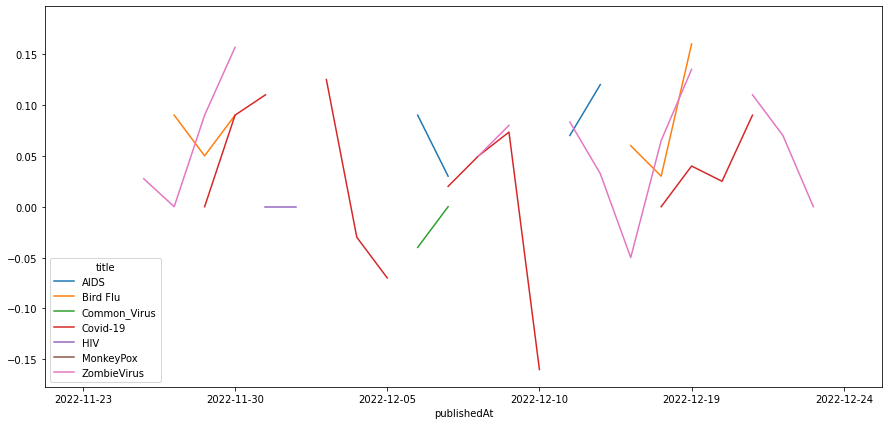

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
df2.groupby(['publishedAt','title']).mean()['sentiment'].unstack().plot(ax=ax,)

### 10. Conclusion<a id=10></a>

1. The **negative** sentiment indicate the postive measure were taken in order to reduce the affect of the virus.
2. The **positive** sentiment indicate there is a need to take postive measure in order to reduce the affect of the virus.
